# Caso y TP #2

In [1]:
# Alumno: Andres Montes de Oca
# Materia: Introduccion al Data Mining
# Fecha EDA: 11/12/2022
# Fecha Modelado: 26/12/2022

In [2]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
from IPython.display import Image

# Suppress Scientific Notation
pd.options.display.float_format = '{:.2f}'.format

# Set environment settings
pd.set_option('display.max_rows', 21)
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', context='notebook', palette='colorblind', color_codes=True)      

# Load Data
# Seteamos ; como separado, y , como decimales
data = pd.read_csv('Data/Churn.csv', sep=';', decimal=',')
print(data.info())
display(data.head())

import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3099 non-null   object 
 1   Account_Length  3099 non-null   int64  
 2   Area_Code       3099 non-null   int64  
 3   Phone           3099 non-null   object 
 4   Intl_Plan       3099 non-null   object 
 5   Vmail_Plan      3099 non-null   object 
 6   Vmail_Message   3099 non-null   int64  
 7   Day_Mins        3099 non-null   float64
 8   Day_Calls       3099 non-null   int64  
 9   Day_Charge      3099 non-null   float64
 10  Eve_Mins        3099 non-null   float64
 11  Eve_Calls       3099 non-null   int64  
 12  Eve_Charge      3099 non-null   float64
 13  Night_Mins      3099 non-null   float64
 14  Night_Calls     3099 non-null   int64  
 15  Night_Charge    3099 non-null   float64
 16  Intl_Mins       3099 non-null   float64
 17  Intl_Calls      3099 non-null   i

State  Account_Length  Area_Code     Phone Intl_Plan Vmail_Plan  \
0    KS             128        415  382-4657        no        yes   
1    OH             107        415  371-7191        no        yes   
2    NJ             137        415  358-1921        no         no   
3    OH              84        408  375-9999       yes         no   
4    OK              75        415  330-6626       yes         no   

   Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0             25    265.10        110       45.07    197.40         99   
1             26    161.60        123       27.47    195.50        103   
2              0    243.40        114       41.38    121.20        110   
3              0    299.40         71       50.90     61.90         88   
4              0    166.70        113       28.34    148.30        122   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  Intl_Mins  Intl_Calls  \
0       16.78      244.70           91         11.01      10.00           3   
1       16.62      254.40          103         11.45      13.70           3   
2       10.30      162.60          104          7.32      12.20           5   
3        5.26      196.90           89          8.86       6.60           7   
4       12.61      186.90          121          8.41      10.10           3   

   Intl_Charge  CustServ_Calls   Churn  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.

## Objetivos

Entrega #1:

• Observar las distribuciones de las variables

• Buscar y eliminar variables correlacionadas.

• Analizar las proporciones de churn para distintas variables.

Entrega #2:

• Particionar los datos.

• Generar tres modelos de árbol

• Evaluar los modelos

## Preguntas de Negocio

1- <b>¿Si Ud. tuviera que implementar un sistema de retención de clientes, considera que Data
Mining puede ser de ayuda en la detección de clientes próximos a abandonar la compañía?
    
Definitivamente si, ya que disponemos de mucha informacion en nuestros datos con el comportamiento del cliente, lo cual nos ayudaria a entender no solo como es que se comportan los mismos antes de darse de baja, sino el comportamiento general en si. En el caso particular de las Telco, como el mercado ya esta muy saturado con distintos proveedores, a las empresas les termina costando mas caro los gastos de inversion para la adquisicion de nuevos clientes (capañas de publicidad, marketing, etc), que los gastos generados a partir de campanas de retencion de clientes (bonificaciones o descuentos ofrecidos en los distintos planes de servicio, o venta de equipos con un alto porcentaje de descuento)
    
2- <b>Tareas de Data Mining se podrían aplicar

Se pueden aplicar muchas tareas distintas. A nivel Descriptivo, las que veo mas factibles a aplicar serian las tareas de minado de Asociaciones y Correlaciones, ya que al disponer de la variable Target (Churn) podemos analizar cuales del resto de las variables estan mas fuerte relacionadas con esta. A nivel Predictivo, aplicariamos alguno de los disitntos algoritmos de Clasificacion que existen, como por ejemplo Arobles de Decision, SVM, Modelos Bayesianos, Regresion Logistica.
    
3- <b>Tipo de datos que requeriría para aplicar a las tareas de Data Mining seleccionadas

Necesitariamos distintos tipos de datos de distintas fuentes. Por ejemplo los datos relacionados con el cliente (ID, Datos Personales, Datos Demograficos). En otra base podria tener datos relacionados con los distintos servicios prestados a ese cliente (Tipo de Servicio, Precio Pactado, Fecha Vencimiento Contrato). Tambien deberiamos tener los datos relacionados con los reclamos de los clientes, seguramente tambien en otra base, como por ejemplo la Fecha de Reclamo, el Tipo de Reclamo, y la Solucion. Con respecto al tipo de dato en si, tendriamos datos de formato Cadena de Caracteres (nombre y apellido), Datos Cuantitativos Continuos (el precio pactado de cada servicio), Cuantitativos Discretos (la cantidad de meses en el servicio), Categoricos Nominales Asimetricos (indicando que servicios tiene contratados), o Categoricos Oridnales (el score de fidelizacion del cliente)
    
4- <b>¿Qué parámetros debería establecer para la tarea o tareas y que valores asignaría a
cada uno?

Deberia decidir que porcentaje de los datos voy a usar para Training, y que porcentaje dejo para Test. Esto depende mucho de que tan balanceado este el Dataset, y de cuantas observaciones disponga (generalmente se hace un 70/30). Dentro del Training, si implemento una tecnica de Cross-Validation deberia elegir la cantidad de Folds a utilizar (generalmente 10 es un buen numero). Otro parametro podria ser el tipo de algoritmo de Clasificacion que voy a utilizar (Arboles, Regresion Logistica, KNN, Redes Neuronales), o si voy a utilizar un modelo de ensamble que utilice todos juntos
    
5- <b>Si observa alguna particularidad en los datos de este problema con respecto al tiempo,
proponga el tratamiento especial que considere adecuado.
 
En este caso de Churn el espacio temporal es fundamental, ya que como bien dice el enunciado se estima que para que la campaña de retencion tenga exito, se necesitan al menos dos meses de anticipacion. Lo que deberia hacerse es una transofrmacion de la variable temporal, llevarla a una escala la cual nos permita operar y aplicar los algoritmos de Data Mining que vayamos a utilizar. El tratamiento que podriamos hacer es Discretizar la variable de tiempo de alguna manera, para llevarla del plano Continuo al plano Ordinal
    
6- <b>Considere el caso de una compañía de telefonía fija con diversas alternativas de Churn (baja
del cliente completo, líneas, Internet, paquetes urbanos, etc.) ¿Cómo aplicaría los resultados obtenidos del mining?
    
Cuando detecte que el cliente se esta quejando mucho por la calidad o el UPTime de alguno de los servicios que tiene contratados con mi empresa, a modo de resarcimiento por las complicaciones le podria ofrecer sin cargo por un determinado tiempo, alguno de los otros servicios que el no tiene contratados. De esta manera me evito perder a un cliente, y tambien podria estar vendiendole un servicio adicional (pasado el tiempo de prueba). Otra insight que podria sacar con el Data Mining seria identificar a los clientes que se aprovechan de esta practica, ya que luego de un tiempo en la empresa muchos clientes son "fidelizados" y el ratio de Churn baja considerablemente.

## Parte A: Analisis de Variables y Target

#### 1 - Churn (Target)

In [3]:
# Vemos el porcentaje de Churn total
print(data.Churn.value_counts(normalize=True), '\n')
print('Cantidad de usuarios dados de baja:', data[data.Churn=='True.'].shape[0])

False.   0.86
True.    0.14
Name: Churn, dtype: float64 

Cantidad de usuarios dados de baja: 447


* 3099 registros, sin valores nullos
* Churn ratio .14

#### 2 - Area_Code

In [4]:
# Distribuimos por Area_Code, y vemos que la dsitribucion del Churn se mantiene igual para cada Area Code
print('Suma de clientes por codigo area:\n', data.Area_Code.value_counts(), '\n')

Suma de clientes por codigo area:
 415    1543
510     781
408     775
Name: Area_Code, dtype: int64 



##### 2.a - Area_Code vs Target

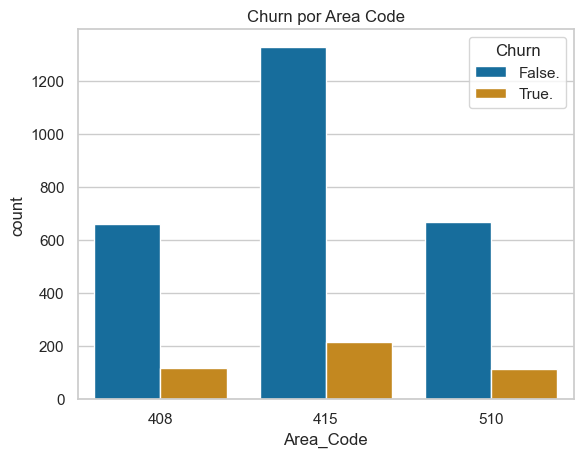

In [5]:
sns.countplot(data=data, x='Area_Code', hue='Churn')
plt.title('Churn por Area Code')
plt.show()

* Se ve como hay muchos mas clientes en el area #415
* El ratio es similar en las tres areas, 100/650. No parece influir en el %Churn

#### 3 - State

Cantidad clientes por State:
 WV    96
MN    82
AL    76
VA    76
NY    75
      ..
AR    47
LA    46
PA    42
IA    41
CA    32
Name: State, Length: 51, dtype: int64 

Resumen estadistico:
 count   51.00
mean    60.76
std     11.30
min     32.00
25%     53.00
50%     60.00
75%     67.00
max     96.00
Name: State, dtype: float64


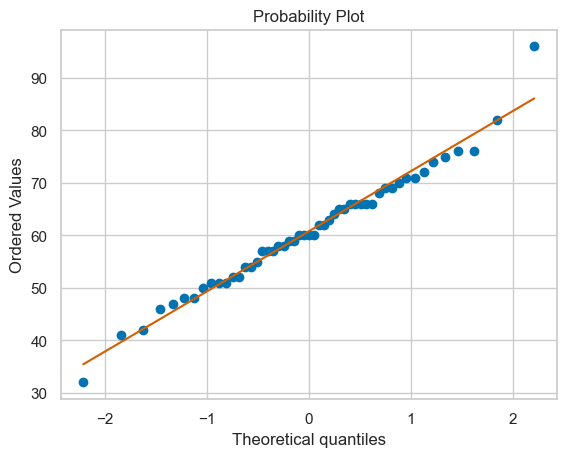

Test de Normalidad:
 ShapiroResult(statistic=0.9846213459968567, pvalue=0.7448787689208984)


In [6]:
# Mostramos cantidades y estadisticas
print('Cantidad clientes por State:\n', data.State.value_counts(), '\n')
print('Resumen estadistico:\n', data.State.value_counts().describe())

# Ploteamos el Distribution Plot
st.probplot(data.State.value_counts(), plot=plt)
plt.show()

# Test de Normalidad
print('Test de Normalidad:\n', st.shapiro(data.State.value_counts()))

* Se observa la normalidad en la distribucion de los datos por Estado

##### 3.a - State vs Target

In [7]:
# Creamos la tabla de contingencia
data_State = pd.crosstab(index=data.Churn, columns=data.State)
display(data_State)

# Le calculamos el %Churn
data_State_Churn_ratio = data_State.apply(lambda x: x[1]/(x[0]+x[1]), axis=0).sort_values(ascending=False)
print('Ratio de Churn por State:\n', data_State_Churn_ratio)

State   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  \
Churn                                                                        
False.  46  68  41  53  24  57  55  45  46  55  44  49  39  60  50  55  53   
True.    2   8   6   4   8   9  11   5   9   8   7   2   2   6   4   7  12   

State   KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  \
Churn                                                                        
False.  49  42  49  51  46  54  67  52  49  53  51  52  55  43  46  52  51   
True.    8   4  11  15  11  15  15   7  13  13   9   6   5   8  18   6  14   

State   NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
Churn                                                                       
False.  60  63  44  60  34  55  38  46  43  54  58  71  61  49  63  86  65  
True.   15   9   8  11   8   5  14   8   5  17  10   5   8  10   7  10   9

Ratio de Churn por State:
 State
NJ   0.28
SC   0.27
CA   0.25
TX   0.24
MD   0.23
     ... 
AZ   0.07
VA   0.07
IA   0.05
AK   0.04
HI   0.04
Length: 51, dtype: float64


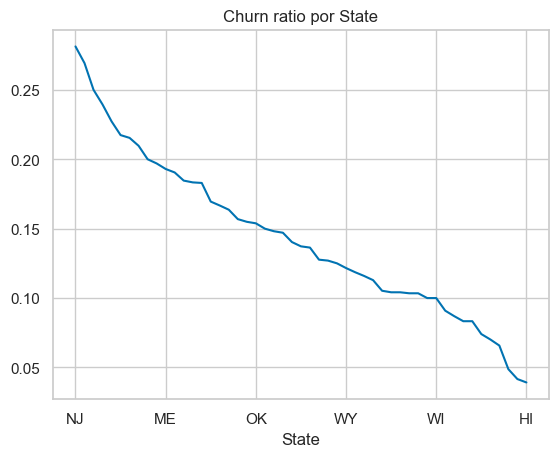

In [8]:
# vemos como el %Churn varia mucho segun los States
data_State_Churn_ratio.plot()
plt.title('Churn ratio por State')
plt.show()

In [9]:
# Geo-referenciamos para visualizar posibles clusters
# !pip install plotly-express
import plotly.express as px

fig = px.choropleth(data_State_Churn_ratio, locationmode='USA-states', 
                    locations=data_State_Churn_ratio.index, 
                   color=data_State_Churn_ratio.values)
fig.show()

* WV el estado mas importante con 96 clientes, y CA el menos con solo 32
* El Churn ratio depende mucho del State, no es una distribucion Uniforme
* NJ el estado donde es mas complicado fidelizar a los clientes, .28 vs .04 de HI en el otro extremo
* En el mapa se detecta a NJ como posible cluster?



#### 4 - Account_Length

count   3099.00
mean     101.18
std       39.85
min        1.00
25%       74.00
50%      101.00
75%      127.00
max      243.00
Name: Account_Length, dtype: float64


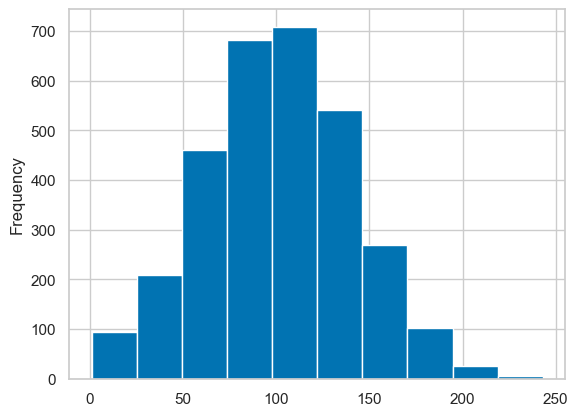

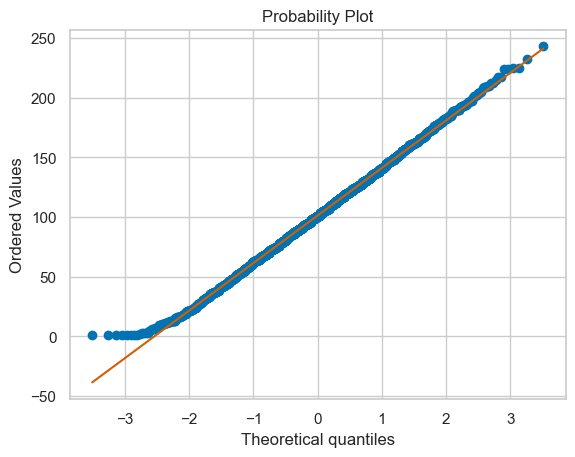

Test Normalidad:
 ShapiroResult(statistic=0.9983476400375366, pvalue=0.002857467159628868)


In [10]:
# Vemos valores agregados
print(data.Account_Length.describe())

# Ploteamos las graficas
data.Account_Length.plot(kind='hist')
plt.show()
st.probplot(data.Account_Length, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Account_Length))

* Tanto el promedio como la mediana, estan cerca de los 101 dias
* Las cuentas nuevas con poco historial interfieren con la normalidad de la distribucion

##### 4.a - Account_Length vs Target

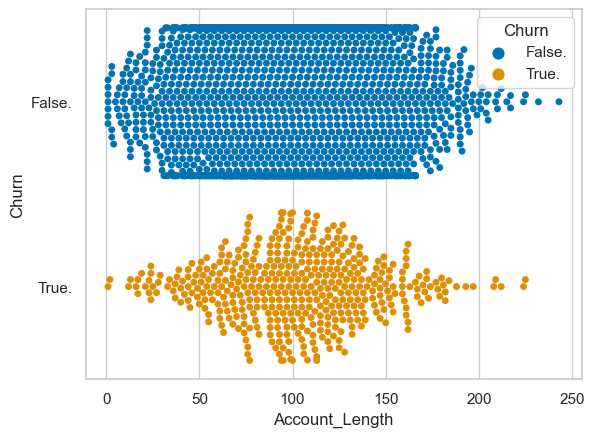

In [11]:
sns.swarmplot(data=data, x='Account_Length', hue='Churn', y='Churn')
plt.show()

* Se ve como la tasa de convertidos primero aumenta hasta mantenerse cerca de los 100, pero luego disminuye

#### 5 - Days_Mins

count   3099.00
mean     179.60
std       54.63
min        0.00
25%      143.90
50%      179.30
75%      216.00
max      350.80
Name: Day_Mins, dtype: float64


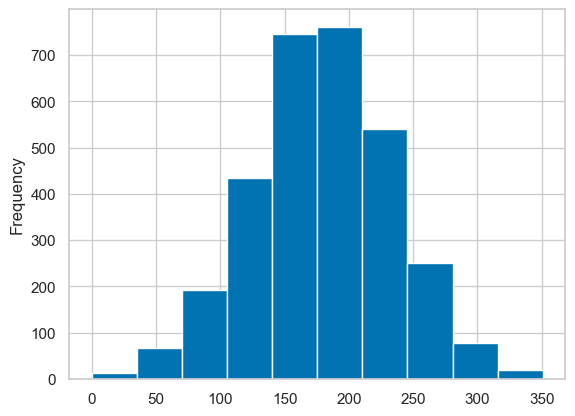

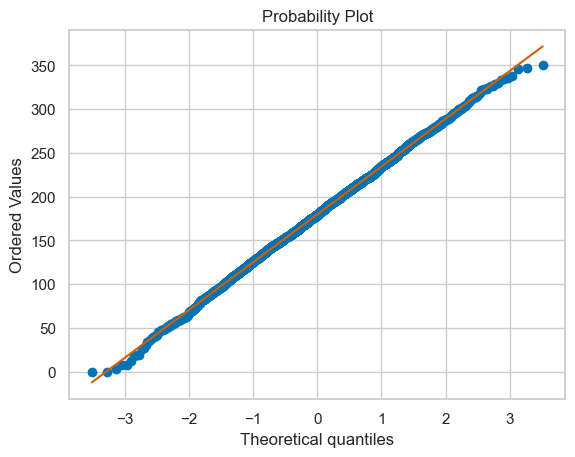

Test Normalidad:
 ShapiroResult(statistic=0.9994632005691528, pvalue=0.5559755563735962)


In [12]:
# Vemos valores agregados
print(data.Day_Mins.describe())

# Ploteamos las graficas
data.Day_Mins.plot(kind='hist')
plt.show()
st.probplot(data.Day_Mins, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Day_Mins))

- El total de minutos consumidos de dia, si parece ser una distribucion normal con media 180

#### 6 - Day_Calls

count   3099.00
mean     100.37
std       20.08
min        0.00
25%       87.00
50%      101.00
75%      114.00
max      165.00
Name: Day_Calls, dtype: float64


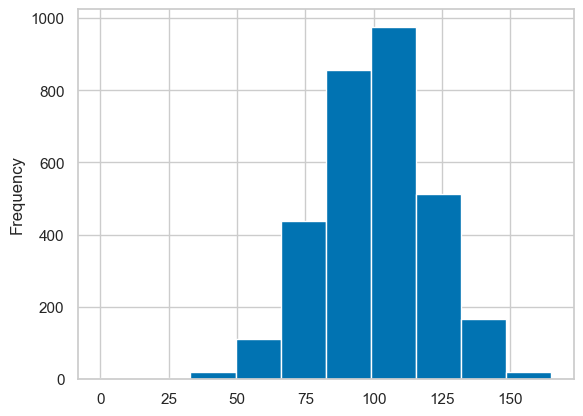

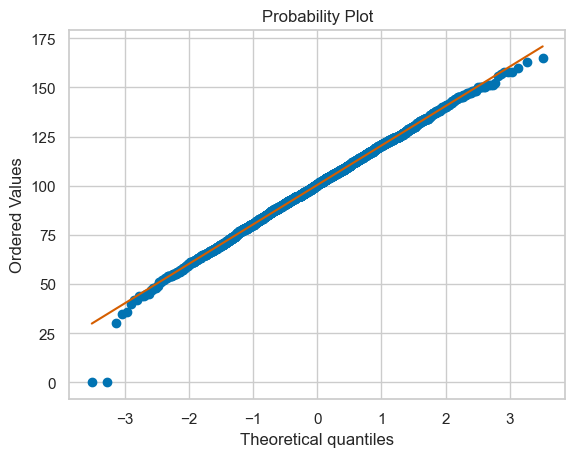

Test Normalidad:
 ShapiroResult(statistic=0.9978486895561218, pvalue=0.0002851416647899896)


In [13]:
# Vemos valores agregados
print(data.Day_Calls.describe())

# Ploteamos las graficas
data.Day_Calls.plot(kind='hist')
plt.show()
st.probplot(data.Day_Calls, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Day_Calls))

* La cantidad de llamadas no pareciera ser una distribucion normal
* Se ve como en ambos extremos pierde la normalidad

#### 7 - Eve_Mins

count   3099.00
mean     201.02
std       50.90
min        0.00
25%      166.60
50%      201.30
75%      235.80
max      363.70
Name: Eve_Mins, dtype: float64


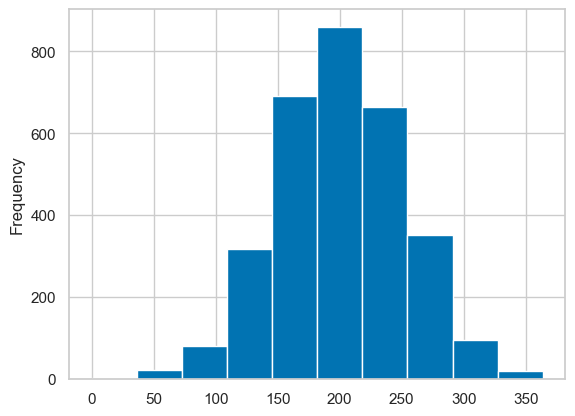

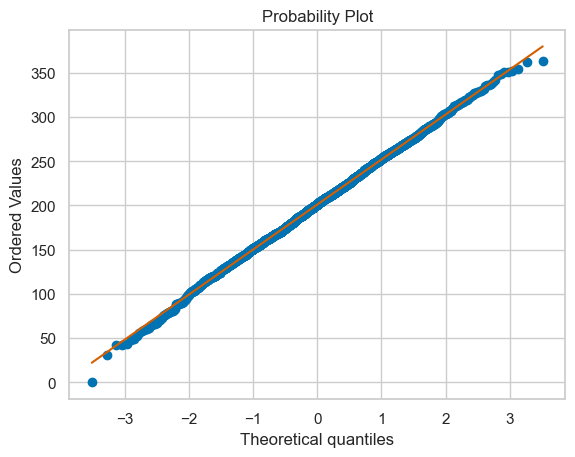

Test Normalidad:
 ShapiroResult(statistic=0.999485969543457, pvalue=0.5998421311378479)


In [14]:
# Vemos valores agregados
print(data.Eve_Mins.describe())

# Ploteamos las graficas
data.Eve_Mins.plot(kind='hist')
plt.show()
st.probplot(data.Eve_Mins, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Eve_Mins))

* La cantidad de minutos consumidos sobre la tarde tambien sigue una distribucion normal, pero con media 200
* La media de minutos consumidos de la tarde es considerablemente mas grande que la de dia

#### 8 - Eve_Calls

count   3099.00
mean     100.01
std       19.86
min        0.00
25%       87.00
50%      100.00
75%      113.50
max      168.00
Name: Eve_Calls, dtype: float64


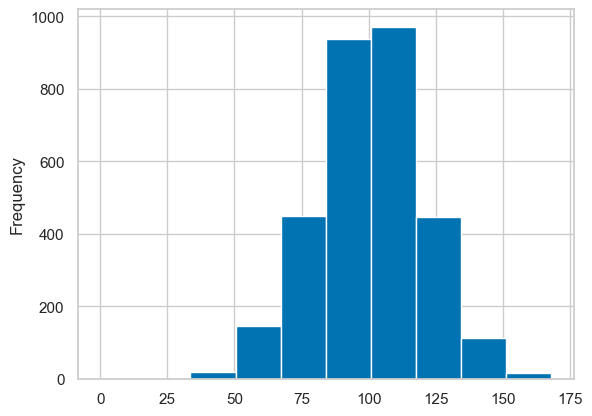

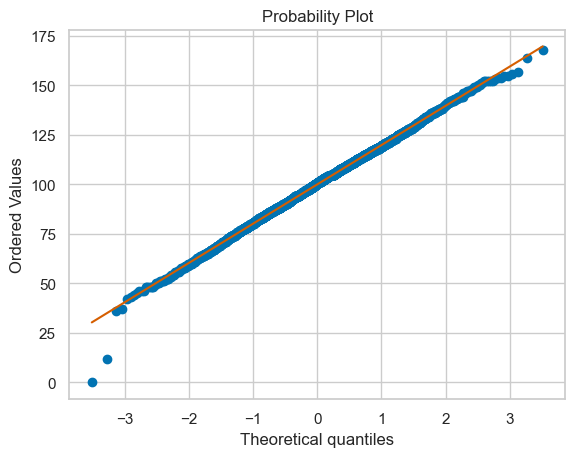

Test Normalidad:
 ShapiroResult(statistic=0.998427152633667, pvalue=0.004191099666059017)


In [15]:
# Vemos valores agregados
print(data.Eve_Calls.describe())

# Ploteamos las graficas
data.Eve_Calls.plot(kind='hist')
plt.show()
st.probplot(data.Eve_Calls, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Eve_Calls))

* La distribucion de cantidad de llamados durante la tarde, es similar a la de durante el dia

#### 9 - Night_Mins

count   3099.00
mean     200.68
std       50.61
min       23.20
25%      167.00
50%      201.30
75%      235.15
max      395.00
Name: Night_Mins, dtype: float64


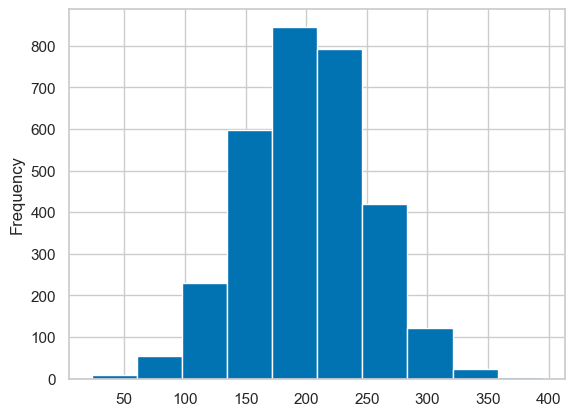

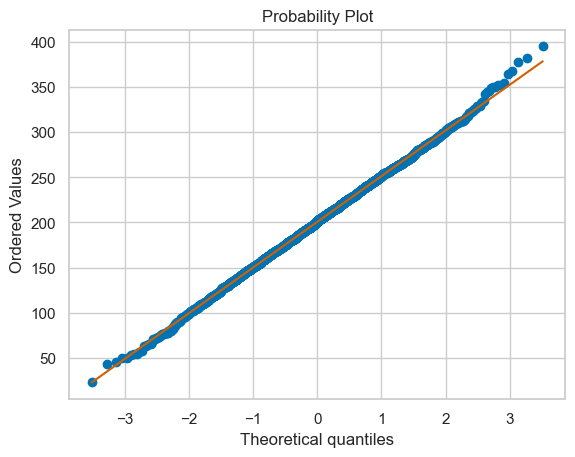

Test Normalidad:
 ShapiroResult(statistic=0.9995291829109192, pvalue=0.6843116879463196)


In [16]:
# Vemos valores agregados
print(data.Night_Mins.describe())

# Ploteamos las graficas
data.Night_Mins.plot(kind='hist')
plt.show()
st.probplot(data.Night_Mins, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Night_Mins))

* La distribucion de los minutos consumidos durante la noche, muy similar a la de la tarde

#### 10 - Night_Calls

count   3099.00
mean      99.97
std       19.51
min       33.00
25%       87.00
50%      100.00
75%      113.00
max      175.00
Name: Night_Calls, dtype: float64


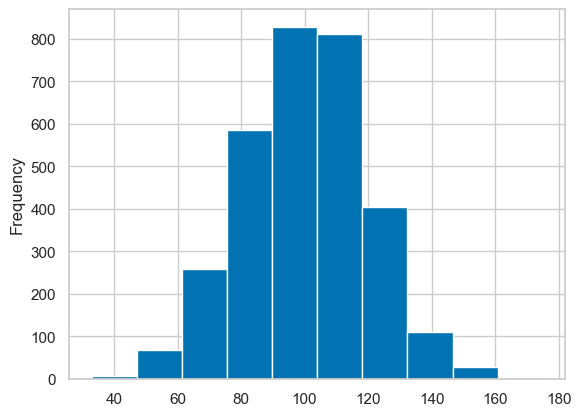

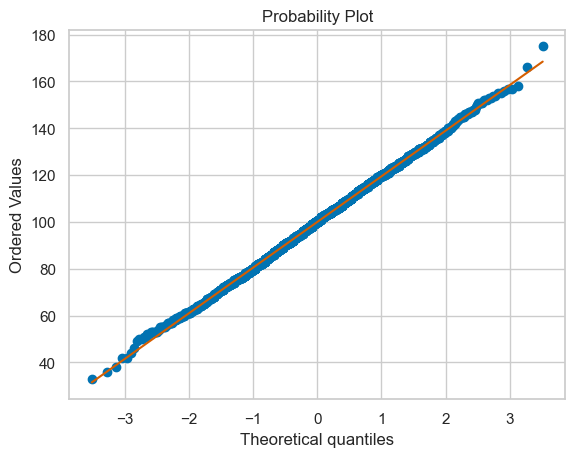

Test Normalidad:
 ShapiroResult(statistic=0.9992457628250122, pvalue=0.2303273230791092)


In [17]:
# Vemos valores agregados
print(data.Night_Calls.describe())

# Ploteamos las graficas
data.Night_Calls.plot(kind='hist')
plt.show()
st.probplot(data.Night_Calls, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Night_Calls))

* La cantidad de llamadas durante la noche, si tiene una distribucion mas normal en comparacion de las otras

#### 11 - Int_Mins

count   3099.00
mean      10.24
std        2.78
min        0.00
25%        8.50
50%       10.30
75%       12.10
max       20.00
Name: Intl_Mins, dtype: float64


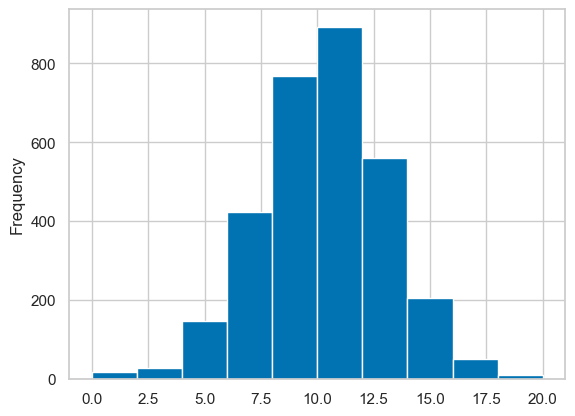

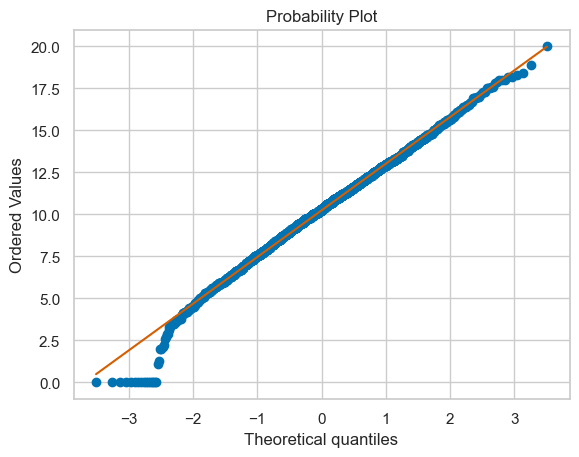

Test Normalidad:
 ShapiroResult(statistic=0.9943463206291199, pvalue=1.4118641811222687e-09)


In [18]:
# Vemos valores agregados
print(data.Intl_Mins.describe())

# Ploteamos las graficas
data.Intl_Mins.plot(kind='hist')
plt.show()
st.probplot(data.Intl_Mins, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Intl_Mins))

* La cantidad de minutos internacionales, no parece estar distribuida normalmente

#### 12 - Intl_Calls

count   3099.00
mean       4.46
std        2.44
min        0.00
25%        3.00
50%        4.00
75%        6.00
max       19.00
Name: Intl_Calls, dtype: float64


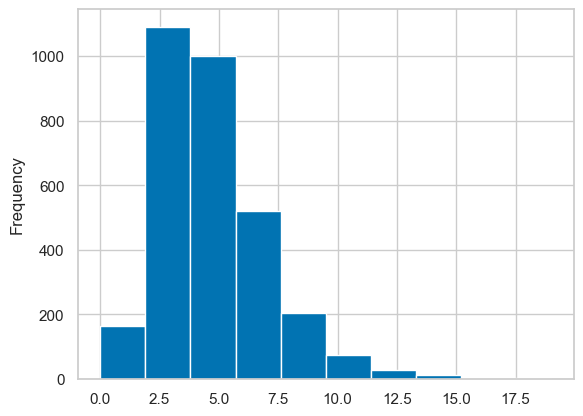

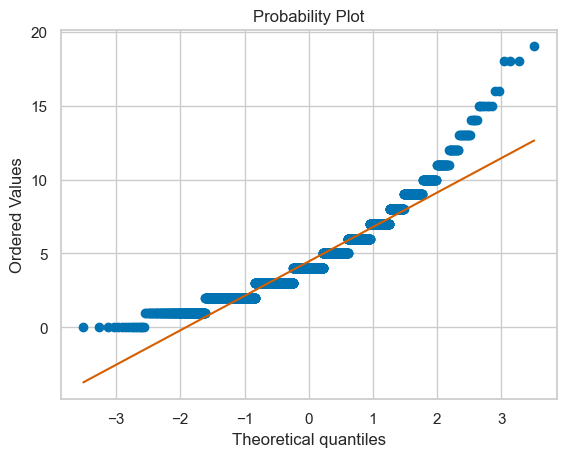

Test Normalidad:
 ShapiroResult(statistic=0.9085267782211304, pvalue=1.0654128276200157e-39)


In [19]:
# Vemos valores agregados
print(data.Intl_Calls.describe())

# Ploteamos las graficas
data.Intl_Calls.plot(kind='hist')
plt.show()
st.probplot(data.Intl_Calls, plot=plt)
plt.show()

# Test de normalidad
print('Test Normalidad:\n', st.shapiro(data.Intl_Calls))

* La cantidad de llamdas internaiconales tampoco se distribuye normalmente

#### 13 - Charges

In [20]:
# Verificamos las tarifas por minuto segun la franja horaria
print('Dia:\n', data['Day_Charge'] / data['Day_Mins'], '\n')
print('Tarde:\n', data['Eve_Charge'] / data['Eve_Mins'], '\n')
print('Noche:\n', data['Night_Charge'] / data['Night_Mins'], '\n')
print('Internacionales:\n', data['Intl_Charge'] / data['Intl_Mins'])

Dia:
 0      0.17
1      0.17
2      0.17
3      0.17
4      0.17
       ... 
3094   0.17
3095   0.17
3096   0.17
3097   0.17
3098   0.17
Length: 3099, dtype: float64 

Tarde:
 0      0.09
1      0.09
2      0.08
3      0.08
4      0.09
       ... 
3094   0.09
3095   0.09
3096   0.08
3097   0.09
3098   0.08
Length: 3099, dtype: float64 

Noche:
 0      0.04
1      0.05
2      0.05
3      0.04
4      0.04
       ... 
3094   0.04
3095   0.05
3096   0.04
3097   0.05
3098   0.05
Length: 3099, dtype: float64 

Internacionales:
 0      0.27
1      0.27
2      0.27
3      0.27
4      0.27
       ... 
3094   0.27
3095   0.27
3096   0.27
3097   0.27
3098   0.27
Length: 3099, dtype: float64


* Se observan los precios de las tarifas, .17 de dia, .085 de tarde, .045 de noche y .27 para internacionales

#### 14 - CustServ_Calls

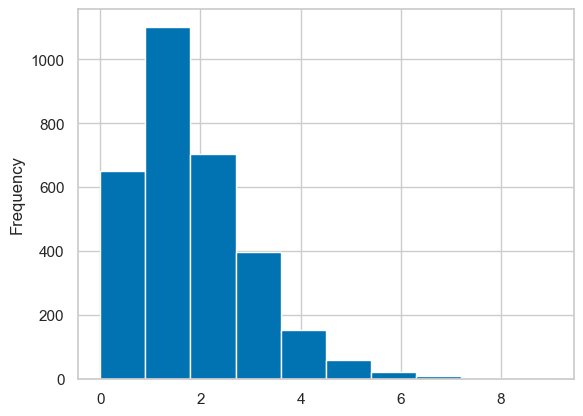

Porcentaje de cantidad de llamados al Help Desk:
 0   0.21
1   0.36
2   0.23
3   0.13
4   0.05
5   0.02
6   0.01
7   0.00
8   0.00
9   0.00
Name: CustServ_Calls, dtype: float64


In [21]:
# Vemos que no es una distribucion normal
data.CustServ_Calls.plot(kind='hist')
plt.show()

# Calculamos cuantas veces llama un usuario al Help Desk, y cuantas veces lo hacen los mismos antes de darse de baja
CustServ_Calls_ratio = data.CustServ_Calls.value_counts()/data.shape[0]
print('Porcentaje de cantidad de llamados al Help Desk:\n', CustServ_Calls_ratio.sort_index())

* Se ve como la gran mayoria de los usuarios llama entre 1 y 2 veces, o inclusive hasta ninguna
* Pocos son los que llaman 3 veces o mas

##### 14.a - CustServ_Calls vs Target

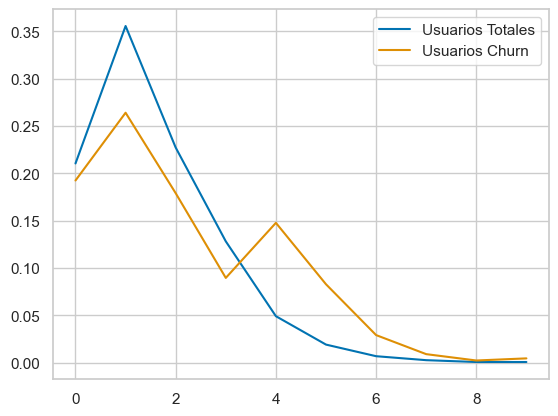

In [22]:
# Lo mismo del punto anterior, pero filtrando solamente los usuarios que se dieron de baja
CustServ_Calls_ratio_Churn = data[data.Churn=='True.'].CustServ_Calls.value_counts()/data[data.Churn=='True.'].shape[0]

# Lo comparamos ploteandolo
fig, ax = plt.subplots()
CustServ_Calls_ratio.sort_index().plot(kind='line', label='Usuarios Totales')
CustServ_Calls_ratio_Churn.sort_index().plot(kind='line', label='Usuarios Churn')
plt.legend()
plt.show()

* Se ve como cuando un usuario hace el tercer llamado al Help Desk, es indicador que se esta a punto de ir

## Parte B: Questionario del Analisis Descriptivo

#### 1) Valores Faltantes

In [23]:
# No se observan valores nulos
print(data.isnull().sum())

State             0
Account_Length    0
Area_Code         0
Phone             0
Intl_Plan         0
Vmail_Plan        0
Vmail_Message     0
Day_Mins          0
Day_Calls         0
Day_Charge        0
Eve_Mins          0
Eve_Calls         0
Eve_Charge        0
Night_Mins        0
Night_Calls       0
Night_Charge      0
Intl_Mins         0
Intl_Calls        0
Intl_Charge       0
CustServ_Calls    0
Churn             0
dtype: int64


#### 2) Comparacion entre Area_Code y State

In [24]:
# A primera vista no veo nada fuera de lo anormal
display(data[['Area_Code', 'State']])

Area_Code State
0           415    KS
1           415    OH
2           415    NJ
3           408    OH
4           415    OK
...         ...   ...
3094        415    MN
3095        415    AL
3096        415    CO
3097        415    ME
3098        415    GA

[3099 rows x 2 columns]

In [25]:
# 51 Estados distintos
print('Estados:\n', data.State.value_counts() ,'\n')

# 3 Codigos de area, con 415 la mas abarcativa
print('Area codes:\n', data.Area_Code.value_counts())

# Agrupamos
data_plot = pd.crosstab(data['Area_Code'], data['State'])
display(data_plot)

Estados:
 WV    96
MN    82
AL    76
VA    76
NY    75
      ..
AR    47
LA    46
PA    42
IA    41
CA    32
Name: State, Length: 51, dtype: int64 

Area codes:
 415    1543
510     781
408     775
Name: Area_Code, dtype: int64


State      AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  \
Area_Code                                                                       
408        13  23  10  13   7  25  22  12  11  12  13  14   8  10  14  13  12   
415        23  38  22  31  16  29  35  26  29  31  21  29  18  37  26  29  33   
510        12  15  15  13   9  12   9  12  15  20  17   8  15  19  14  20  20   

State      KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  \
Area_Code                                                                       
408        15  12  22  15  13  12  19  13  14  17  22  17  13  22  14  15  14   
415        31  24  26  39  23  37  39  35  31  32  25  26  33  18  31  32  34   
510        11  10  12  12  21  20  24  11  17  17  13  15  14  11  19  11  17   

State      NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
Area_Code                                                                      
408        18  20  15  14  14  11  10  14  10  20  10  25  16  23  20  18  16  
415        42  36  24  40  19  33  26  25  27  36  35  34  34  24  31  48  40  
510        15  16  13  17   9  16  16  15  11  15  23  17  19  12  19  30  18

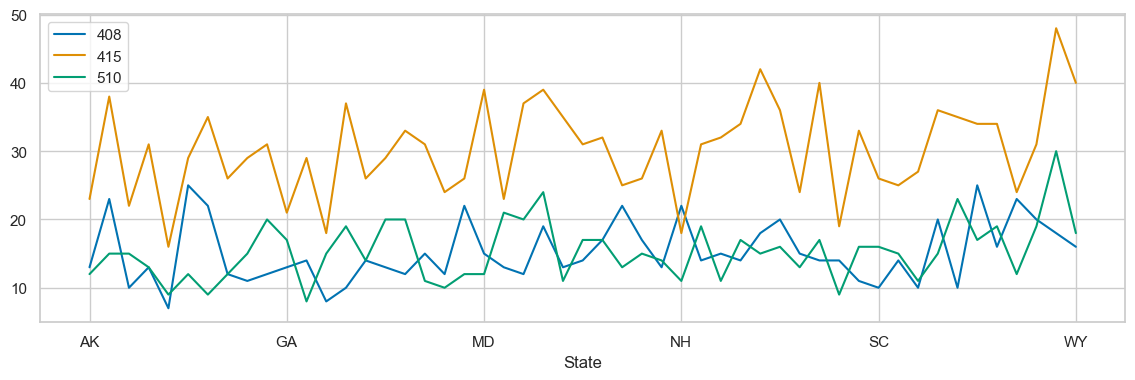

In [26]:
# Ploteamos
fig, ax = plt.subplots(figsize=(14, 4))

# Hacemos un for para dibujar cada linea (Area_Code) de manera individual
for row in data_plot.index:
    data_row = data_plot.loc[row]
    data_row.plot()

# No se como ponerle los ticks al X de manera correcta
# ax.set_xticks(data_plot.columns.values)
# ax.set_xticklabels(data_plot.columns.values)
ax.legend()  
plt.show()

# Se ve que 415 (amarillo) es el codigo de area mas asignado en todos los estados, con excepcion de NH

#### 3) Distribucion de CustServ_Calls - Metodo Grafico

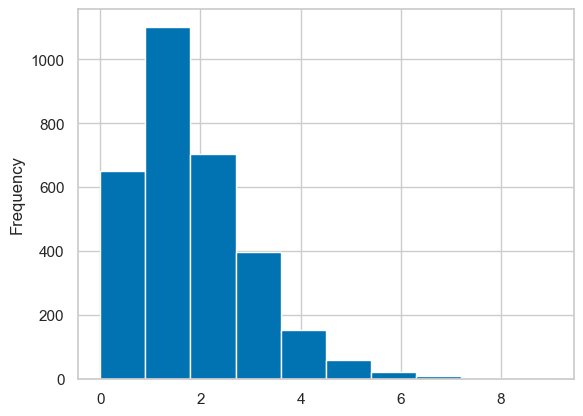

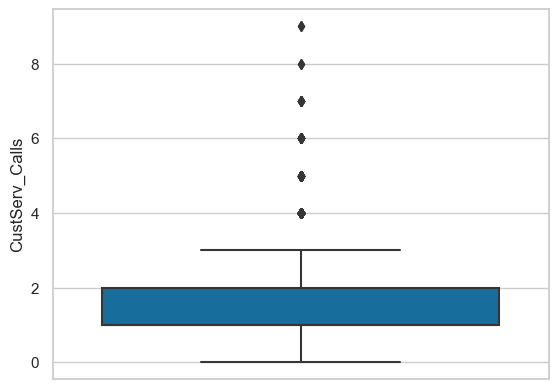

In [27]:
# Vemos en el histograma que la moda de llamados es de 1, con algo de skew hacia la drecha
data.CustServ_Calls.plot(kind='hist')
plt.show()

# Visualizamos los outliers
sns.boxplot(y=data.CustServ_Calls, showfliers=True)
plt.show()

#### 4) Analisis de Outliers para CustServ_Calls

In [28]:
# Pendiente

#### 5) Estandarizacion de Day_Mins

In [29]:
# Vemos que la variable no esta estandarizada, nos damos cuenta por la media y std
print('Day_Mins raw:\n', data.Day_Mins.describe(), '\n')

# La estandarizamos
Day_Mins_std = st.zscore(data.Day_Mins)
print('Day_mins std:\n', Day_Mins_std.describe())

Day_Mins raw:
 count   3099.00
mean     179.60
std       54.63
min        0.00
25%      143.90
50%      179.30
75%      216.00
max      350.80
Name: Day_Mins, dtype: float64 

Day_mins std:
 count   3099.00
mean       0.00
std        1.00
min       -3.29
25%       -0.65
50%       -0.01
75%        0.67
max        3.13
Name: Day_Mins, dtype: float64


#### 6) Checkeamos los sesgos

Skew datos originales:
 -0.03748006570857564 

Skew datos standarizados:
 -0.03748006570857573


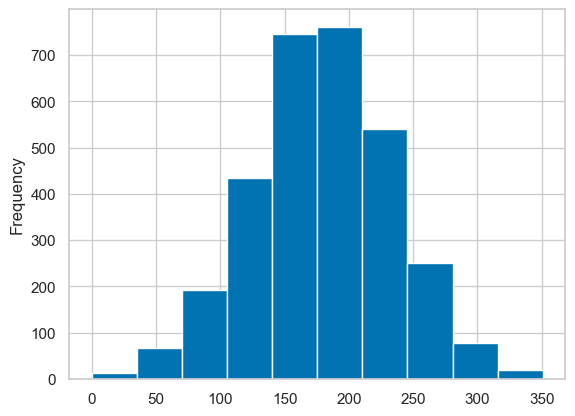

In [30]:
# Vemos como la variable original esta un poco sezgada hacia la izquierda
print('Skew datos originales:\n', st.skew(data.Day_Mins), '\n')

# La variable original tiene el mismo sezgo
# Esto es logico ya que la estandarizacion solo modifica la escala de valores y no la fora de la distribucion
print('Skew datos standarizados:\n', st.skew(Day_Mins_std))


# Ploteamos y confirmamos su simetria casi perfecta
data.Day_Mins.plot(kind='hist')
plt.show()

#### 7) Normal Probability Plot (QQ Plot)

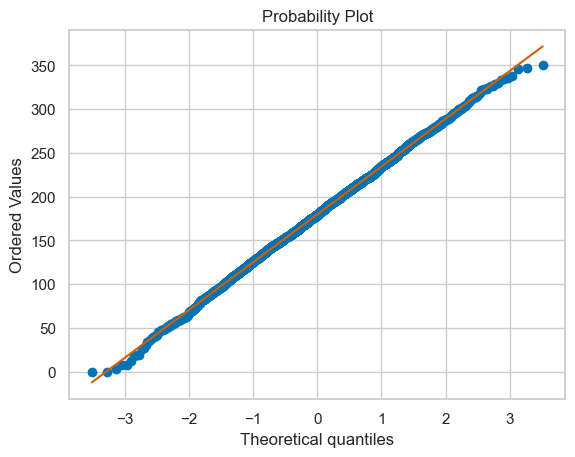

ShapiroResult(statistic=0.9994632005691528, pvalue=0.5559755563735962)


In [31]:
# Vemos como los data points se distribuyen casi perfecto en la linea de normalidad
st.probplot(data.Day_Mins, plot=plt)
plt.show()

# Relizamos un test de normalidad, y vemos que el p-value es muy alto com para rechazarlo. Reconfirmamos la normalidad
print(st.shapiro(data.Day_Mins))

#### 8) International Minutes (Intl_Mins)

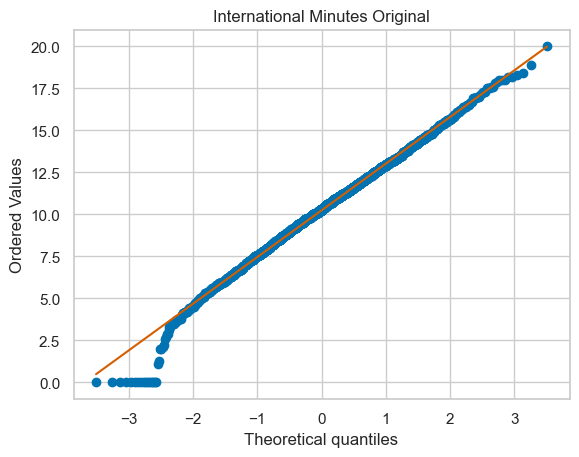

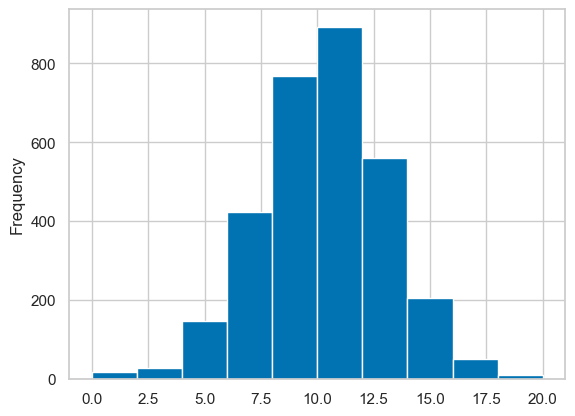

Test de Normalidad:
 ShapiroResult(statistic=0.9943463206291199, pvalue=1.4118641811222687e-09)


In [32]:
# a) Ploteamos
st.probplot(data.Intl_Mins, plot=plt)
plt.title('International Minutes Original')
plt.show()

# b) La causa de la no-normalidad es que hay muchos valores en 0
data.Intl_Mins.plot(kind='hist')
plt.show()
print('Test de Normalidad:\n', st.shapiro(data.Intl_Mins))

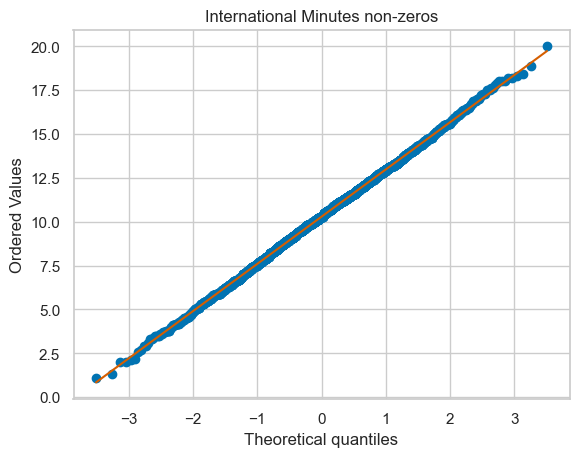

In [33]:
# c) Contruccion de variable indicadora: No se a lo que se refiere con esto. Que es una variable indicadora?
# Se refiere a discretizar la variable? No entiendo esta pregunta

# d) QQ Plot sin ceros
# Se ve como se normaliza luego de scarle los 0
Intl_Mins_nonzero = data.Intl_Mins[data.Intl_Mins!=0]
st.probplot(Intl_Mins_nonzero, plot=plt)
plt.title('International Minutes non-zeros')
plt.show()

#### 9) Night Minutes (Night_Mins)

Rango de valores desde -3.51 hasta 3.84


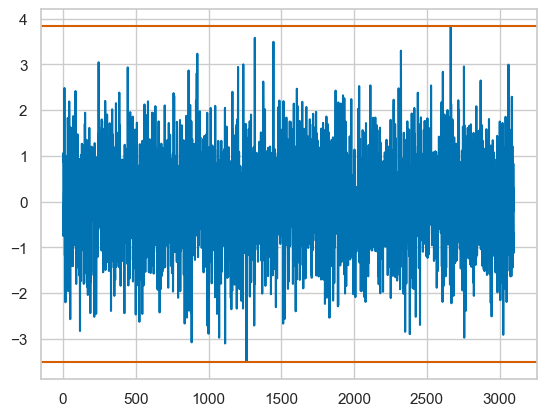

In [34]:
# Standarizo la variable
Night_Mins_std = st.zscore(data.Night_Mins)

# Plot
fig, ax = plt.subplots()
ax.plot(Night_Mins_std)

# Graficamos lineas Min y Max
ax.axhline(y=Night_Mins_std.min(), color='r')
ax.axhline(y=Night_Mins_std.max(), color='r')
print('Rango de valores desde', np.round(Night_Mins_std.min(), 2), 'hasta', np.round(Night_Mins_std.max(), 2))
plt.show()

#### 10) Correlacion de Variables

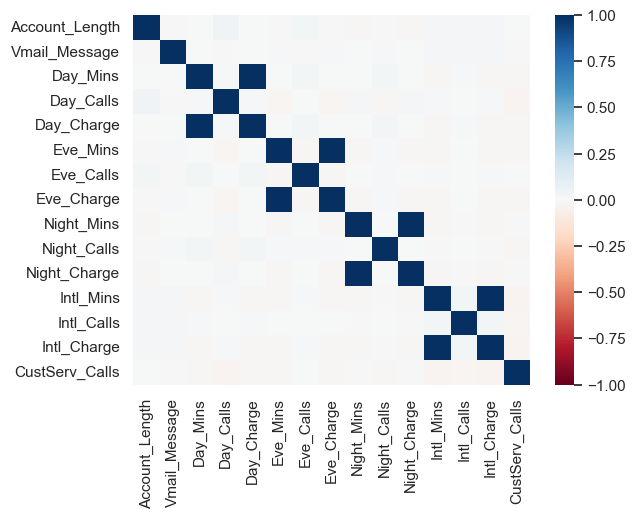

In [35]:
# Definimos entre que variables vamos a analizar la correlacion
num_cols = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', \
           'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']

# Matriz de correlacion
# Se ve una correlacion de 1:1 entre el cargo total y la cantidad de minutos consumidos (para dia, tarde, noche e int)
# Esto significa que hay 4 tarifas distintas en los servicios
sns.heatmap(data[num_cols].corr(), vmin=-1, vmax=1, cmap='RdBu')
plt.show()

## Parte C: Interpretcion y Conclusiones del EDA

* No hay valores nulos en ninguna de las variables

* De los casi 3100 usuario, 447 se dieron de baja en algun momento del ciclo de vida del servicio, lo que representa un 14%

* El codigo de area #415 posee casi el doble de usuarios que #510 y #408. Pero la distribuvion de Churn entre los 3 es similar (14%)

* Hay 51 estados distitnos, el que tiene mas usuarios es WV con 96, y el que menos tiene es CA con 32. 

* En todos los estados el codigo de area mayoritario es #415, con una excpecion en NH donde lo es el #408

* La distribucion de los usuarios por estado es normal, con media y mediana cercana a 60. Pero las proporciones de Churn de cada estado son bastantes distintas en cada uno de ellos. New Jersey resaltandose sobre el resto

* La distribucion de la antiguedad de los usuarios es normal (si no tenemos en cuenta usuarios muy nuevos), con media cercana a los 101 dias

* La desercion de clientes se hace mas marcada luego de los 90 dias iniciales y hasta los 120 aprox. Luego se reduce drasticamente

* El tiempo medio hablado por telefono durante lo largo del dia/mes es normal, pero la media de las llamadas diurnas es de 180 vs las de la tarde y noche que son de 200

* La distribucion de la cantidad de llamados a lo largo del dia tambien esta bastante normalizada (si no tomamos en cuenta los extermos), realizandose cerca de 100 llamadas por rango horario

* Con las llamadas internacionales tenemos el mismo problema, ya que muchos usuarios no utilizan este servicio esto disminuye la normalidad de la variable

* Hay una alta correlaicon en las varibales de Charge, ya que parecen ser la cantidad de minutos hablados por algun ponderador de precio

* Las tarifas por minuto se van reduciendo durante el transcurso del dia. Unos 0.17 durnate el dia, 0.09  durante la tarde y 0.05 por la noche. El precio de las llamdas internacionales es dijo de 0.27 ctvs

* La mayoria de los clientes llama al help desk entre 0 y 2 eveces, pero el que llama 4 veces ya tiene muchas mas probabilidades de darlo de baja. Deberiamos setear nuestro umbral critico entre el 2do y 3er llamado del cliente

## Parte D: Transformaciones y Modelado

#### 1) Eliminacion Variables

In [36]:
# Dropeamos las variables altamente correlacionadas
data.drop(columns=['Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge'], inplace=True)

# Dropeamos la variable Phone_Number
data.drop(columns='Phone', inplace=True)

#### 2) Normalizacion Variables Continuas

In [37]:
# Definimos las variables a standarizar (solo continuas, no discretas)
cont_cols = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']

# Generamos el DF con las variables continuas
data_cont_norm = st.zscore(data[cont_cols])

display(data_cont_norm.head())

Day_Mins  Eve_Mins  Night_Mins  Intl_Mins
0      1.57     -0.07        0.87      -0.09
1     -0.33     -0.11        1.06       1.24
2      1.17     -1.57       -0.75       0.71
3      2.19     -2.73       -0.07      -1.31
4     -0.24     -1.04       -0.27      -0.05

#### 3) Normalizacion Variables Discretas

In [38]:
# No estoy seguro cual es el mejor trato para las variables discretas, asi que por ahora no hago nada con ellas
disc_cols = ['Account_Length', 'Vmail_Message', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'CustServ_Calls']

# Las discretas sin modificar
data_disc = data[disc_cols]

display(data_disc)

Account_Length  Vmail_Message  Day_Calls  Eve_Calls  Night_Calls  \
0                128             25        110         99           91   
1                107             26        123        103          103   
2                137              0        114        110          104   
3                 84              0         71         88           89   
4                 75              0        113        122          121   
...              ...            ...        ...        ...          ...   
3094              91              0         61         96           92   
3095             181             27         93        127           82   
3096             118             36        106        115           63   
3097             112              0        114        119           78   
3098              93              0        121        131          125   

      Intl_Calls  CustServ_Calls  
0              3               1  
1              3               1  
2              5               0  
3              7               2  
4              3               3  
...          ...             ...  
3094           2               1  
3095           4               1  
3096           5               3  
3097          11               2  
3098           4               0  

[3099 rows x 7 columns]

#### 4) Variables Nominales

In [39]:
# OneHot Encoder para las Nominales
from sklearn.preprocessing import OneHotEncoder

# Seleccino las nominales
nominal_cols = ['State', 'Area_Code', 'Intl_Plan', 'Vmail_Plan']

# Genero el objeto
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Transformo a dummies las nominales, manteniendo el nombre
data_nom = pd.DataFrame(oh_encoder.fit_transform(data[nominal_cols]), columns=oh_encoder.get_feature_names(nominal_cols))
display(data_nom.head())

print('Tamano de Matriz Nominales:\n', data_nom.shape)

State_AK  State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_DC  State_DE  State_FL  State_GA  State_HI  State_IA  State_ID  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_IL  State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  \
0      0.00      0.00      1.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_ME  State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_ND  State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      1.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_OH  State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      1.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      1.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      1.00      0.00      0.00      0.00      0.00      0.00   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_WV  State_WY  Area_Code_408  Area_Code_415  Area_Code_510  \
0      0.00      0.00           0.00           1.00           0.00   
1      0.00      0.00           0.00           1.00           0.00   
2      0.00      0.00           0.00           1.00           0.00   
3      0.00      0.00           1.00           0.00           0.00   
4      0.00      0.00           0.00           1.00           0.00   

   Intl_Plan_no  Intl_Plan_yes  Vmail_Plan_no  Vmail_Plan_yes  
0          1.00           0.00           0.00            1.00  
1          1.00           0.00           0.00            1.00  
2          1.00           0.00           1.00            0.00  
3          0.00           1.00           1.00            0.00  
4          0.00           1.00           1.00            0.00

Tamano de Matriz Nominales:
 (3099, 58)


#### 5) Variables Ordinales
No se observan variables ordinales, pero discretizamos las continuas para ver si generan un modelo mejor

##### 5.a Discretizamos

In [40]:
# Preparamos la Discretizacion
print('Variables Contunias del DF original:', cont_cols)

# Generamos los labels y el DF vacio. Dividimos en 5 partes iguales
group_labels = ['muy bajo', 'bajo', 'promedio', 'alto', 'muy alto']
data_ord = pd.DataFrame()

# Recorro y discretizo cada variable individualmente
for col in cont_cols:
    serie_ord = pd.Series(pd.qcut(data[col], q=5, labels=group_labels), name=col)
    data_ord = pd.concat([data_ord, serie_ord], axis=1)
    
# Displayamos la discretizacion
display(data_ord.head())

Variables Contunias del DF original: ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']


Day_Mins  Eve_Mins Night_Mins Intl_Mins
0  muy alto  promedio   muy alto  promedio
1      bajo  promedio   muy alto  muy alto
2  muy alto  muy bajo       bajo      alto
3  muy alto  muy bajo   promedio  muy bajo
4  promedio  muy bajo       bajo  promedio

##### 5.b Transofrmamos

In [41]:
# Usamos Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
data_ord_encoded = pd.DataFrame(ord_encoder.fit_transform(data_ord), columns=data_ord.columns)

display(data_ord_encoded.head())

# No se como darle el orden correcto a las categorias

Day_Mins  Eve_Mins  Night_Mins  Intl_Mins
0      2.00      4.00        2.00       4.00
1      1.00      4.00        2.00       2.00
2      2.00      3.00        1.00       0.00
3      2.00      3.00        4.00       3.00
4      4.00      3.00        1.00       4.00

#### 6) Variable Target

In [42]:
# Usamos Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data_target = pd.Series(label_encoder.fit_transform(data.Churn), name='Churn')

display(data_target.head())
print('Ratio de Churn original:', data_target.mean())

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

Ratio de Churn original: 0.1442400774443369


#### 7) Concatenacion de las Variables Transformadas

In [43]:
# Generamos el Dataset Final con el cual vamos a modelar

# Opcion A: Usando las Variables Continuas Normalizadas 
data_final_A = pd.concat([data_cont_norm, data_disc, data_nom, data_target], axis=1)
data_final = data_final_A

# Mostramos
display(data_final.head())
print('Shape del Dataset Final:', data_final.shape)

Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  Account_Length  Vmail_Message  \
0      1.57     -0.07        0.87      -0.09             128             25   
1     -0.33     -0.11        1.06       1.24             107             26   
2      1.17     -1.57       -0.75       0.71             137              0   
3      2.19     -2.73       -0.07      -1.31              84              0   
4     -0.24     -1.04       -0.27      -0.05              75              0   

   Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  CustServ_Calls  State_AK  \
0        110         99           91           3               1      0.00   
1        123        103          103           3               1      0.00   
2        114        110          104           5               0      0.00   
3         71         88           89           7               2      0.00   
4        113        122          121           3               3      0.00   

   State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_DE  State_FL  State_GA  State_HI  State_IA  State_ID  State_IL  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0      0.00      1.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  State_OH  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      1.00   
2      0.00      0.00      1.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      1.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  State_TN  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      1.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State_WV  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00  

Shape del Dataset Final: (3099, 70)


#### 8) Generacion del Hold-Out Set

In [44]:
# Spliteamos para poder validar el modelo con datos no vistos durante el entrenamiento
from sklearn.model_selection import train_test_split

# Separo los Datos del Target
X = data_final.drop(columns='Churn')
y = data_final.Churn

# Hago el Holdout de Test en un 30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=1)

print('Cantidad Registros Totales:', y.shape[0])
print('Cantidad Registros Train:', ytrain.shape[0])
print('Cantidad Registros Test(Hold-Out Set):', ytest.shape[0])

Cantidad Registros Totales: 3099
Cantidad Registros Train: 2169
Cantidad Registros Test(Hold-Out Set): 930


#### 9) Modelamos usando Arboles de Decision

In [45]:
from sklearn import tree

# Seteamos la cantidad maxima de niveles en 3, para poder visualizarlo facilmente
tree_model = tree.DecisionTreeClassifier(max_depth=3)

# Entrenamos con Train, y predecimos con Test
tree_model.fit(Xtrain, ytrain)
ypred= tree_model.predict(Xtest)

##### 9.a Ploteo

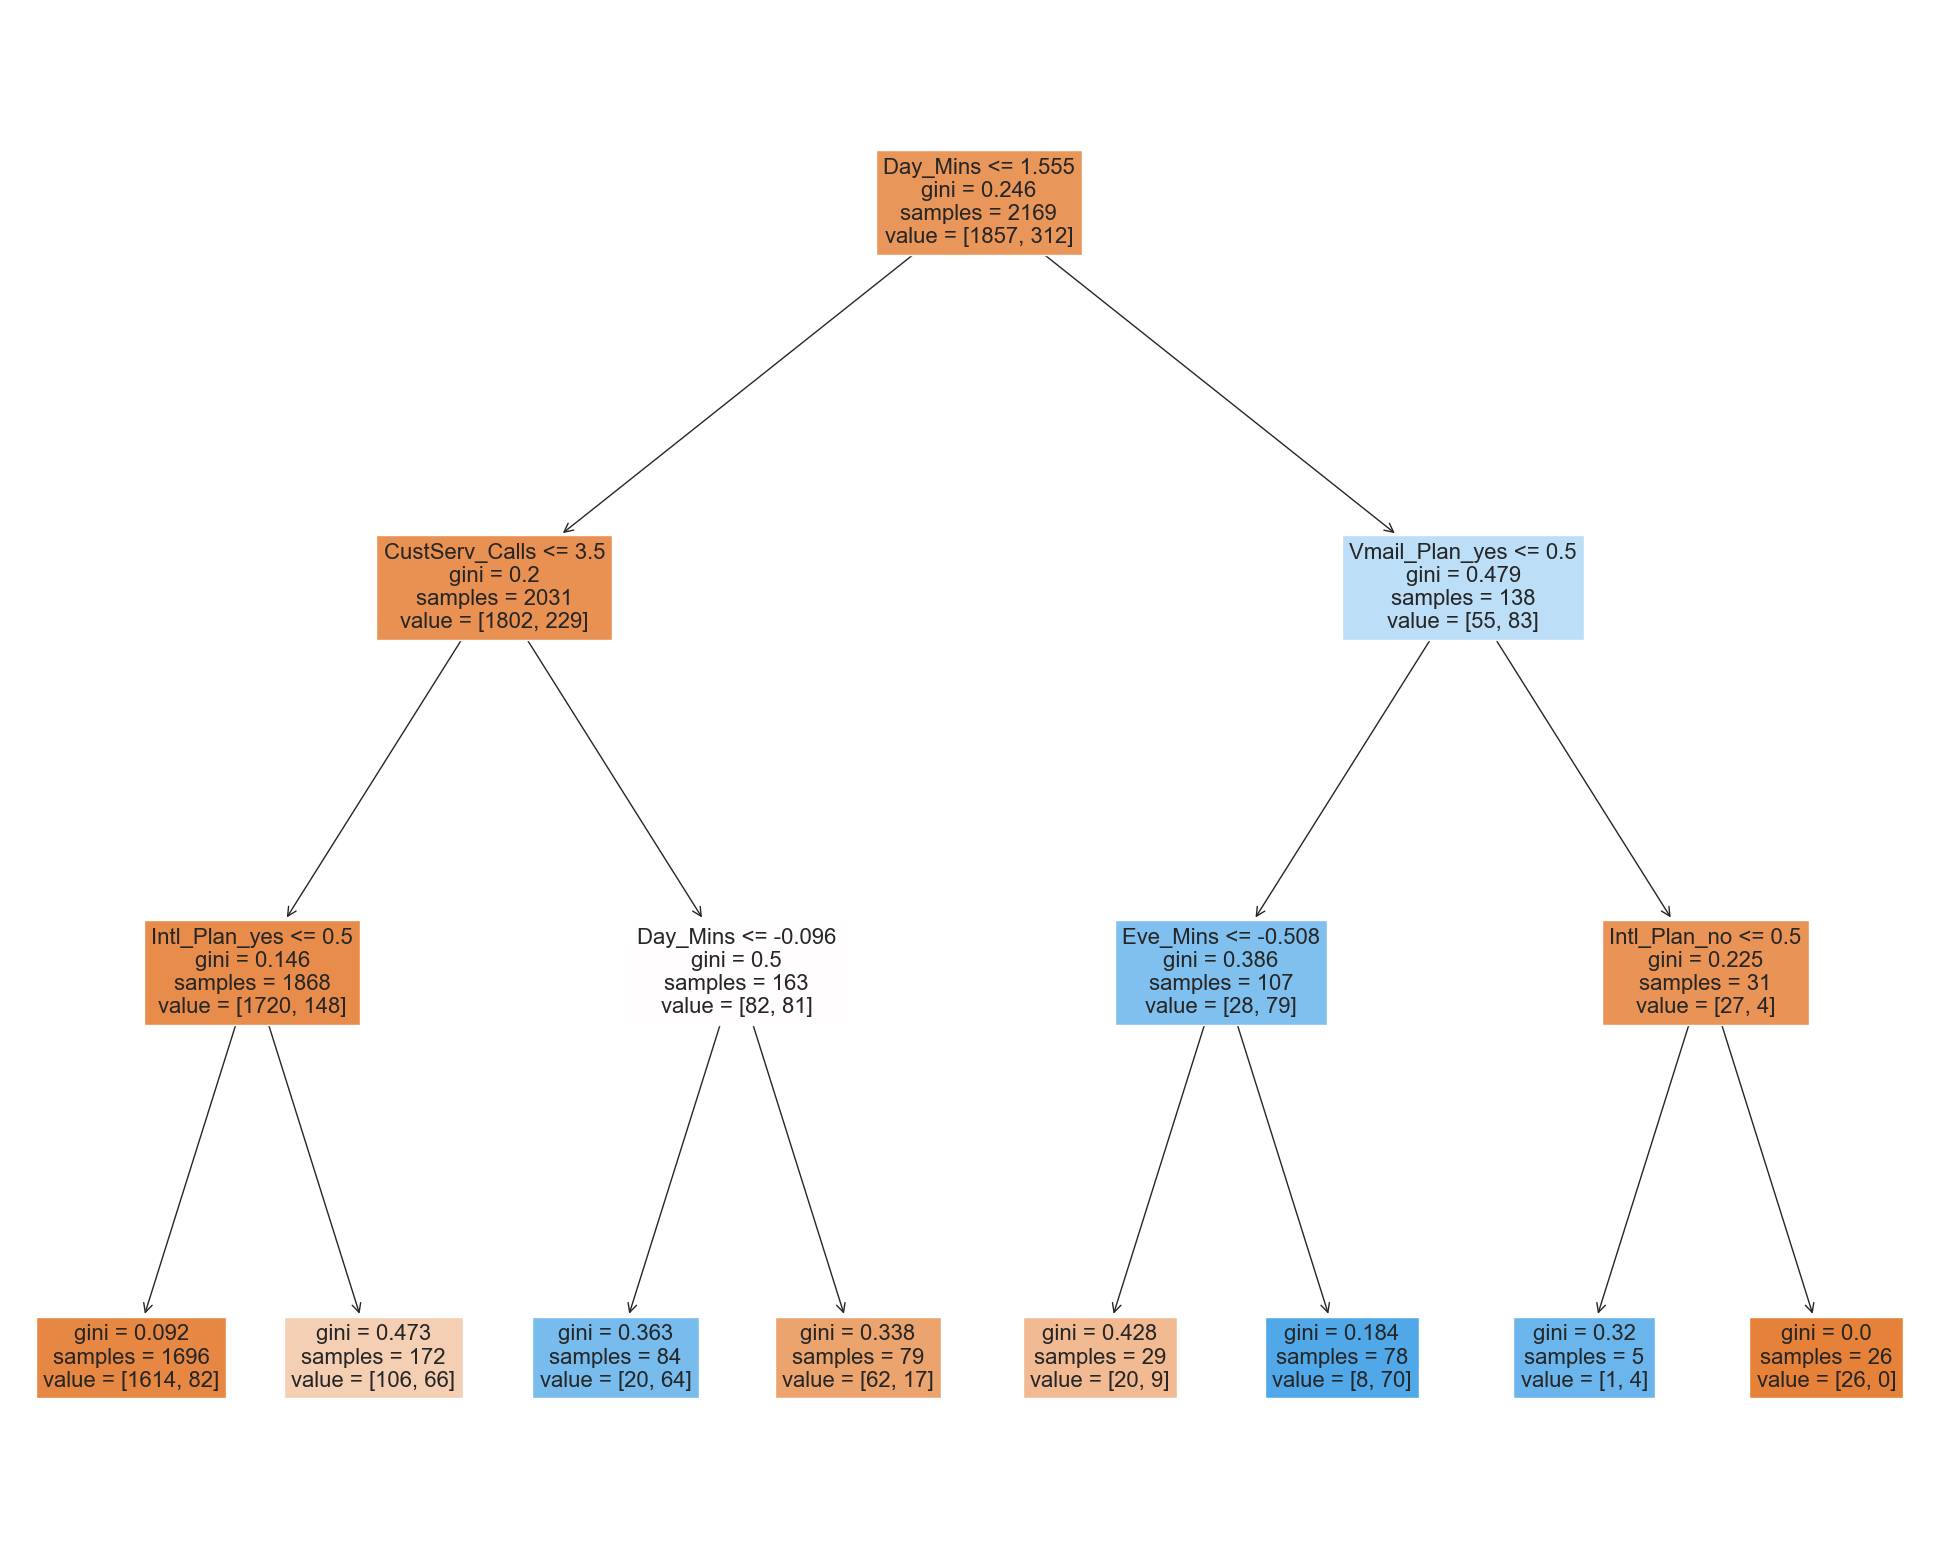

In [46]:
# Ploteamos
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(tree_model, feature_names=X.columns, filled=True)

# Day_Mins es siempre el nodo raiz, ya que como vimos en el EDA es el que genera

#### 10) Evaluacion del Modelo

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Generamos y Mostramos la Matriz de Confusion
# cm = confusion_matrix(ytest, ypred)
# display(sns.heatmap(cm, annot=True, fmt='d'))

# Vemos los valores de las distintas metricas: Accuracy, Precision
print('Accuracy:', accuracy_score(ytest, ypred))
print('Precision:', precision_score(ytest, ypred))

# La metrica que mas me iporta es la Precision, ya que me indica a cuantos clientes de Churn identifico correctamente
# Obtengo una Precision de cerca del 80%

Accuracy: 0.9021505376344086
Precision: 0.8055555555555556


#### 11) Modelamos nuevamente pero buscando Hiperparametros Optimos y con Cross-Validation

In [48]:
# Buscamos Hipeparametros Optimos y usamos CV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Generamos los folds para el CV
folds = StratifiedKFold(n_splits=10, shuffle=True)

# Instanciamos el Modelo base
model_base = tree.DecisionTreeClassifier()

# Definimos la grilla de Hiperparametros
criterion = ['gini', 'entropy'] # Medir Pureza de la clase
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10] # Cant niveles del arbol, para no overfitear
min_samples_split = [2, 3, 4, 5] # Cantidad minima de objetos en el nodo para volver a clasificar
splitter = ['best', 'random']
param_grid = dict(criterion=criterion, max_depth=max_depth, splitter=splitter, min_samples_split=min_samples_split)

# Instanciamos con la grilla de Hiperparametros y predecimos
model_grid_search = GridSearchCV(estimator=model_base, param_grid=param_grid, cv=folds, scoring='precision')
model_grid_search.fit(Xtrain, ytrain)
# ypred_grid_search = model_grid_search.predict(Xtest)

# Vemos solo los mejores parametros (ya calculados)
print('Top Params:', model_grid_search.best_params_)
print('Top Precision Score:', model_grid_search.best_score_)

# Vemos como la Precision del modelo es muy buena, ~88%

Top Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5, 'splitter': 'best'}
Top Precision Score: 0.8736905990466362


#### 12) Modelos Alternativos

##### 12.b Discretizando las Variables Continuas

In [49]:
# Opcion B: Usando las Variables Continuas Discretizadas
data_final_B = pd.concat([data_ord_encoded, data_disc, data_nom, data_target], axis=1)
data_final = data_final_B
display(data_final.head())

# Spliteamos para poder validar el modelo con datos no vistos durante el entrenamiento
from sklearn.model_selection import train_test_split

# Separo los Datos del Target
X = data_final.drop(columns='Churn')
y = data_final.Churn

# Hago el Holdout de Test en un 30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=1)

# Instanciamos con la grilla de Hiperparametros y predecimos
model_grid_search = GridSearchCV(estimator=model_base, param_grid=param_grid, cv=folds, scoring='precision')
model_grid_search.fit(Xtrain, ytrain)

# Vemos solo los mejores parametros (ya calculados)
print('Top Params:', model_grid_search.best_params_)
print('Top Precision Score:', model_grid_search.best_score_)

# La discretizacion de las variables continuas empeora el modelo, la Precision cae al ~78%

Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  Account_Length  Vmail_Message  \
0      2.00      4.00        2.00       4.00             128             25   
1      1.00      4.00        2.00       2.00             107             26   
2      2.00      3.00        1.00       0.00             137              0   
3      2.00      3.00        4.00       3.00              84              0   
4      4.00      3.00        1.00       4.00              75              0   

   Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  CustServ_Calls  State_AK  \
0        110         99           91           3               1      0.00   
1        123        103          103           3               1      0.00   
2        114        110          104           5               0      0.00   
3         71         88           89           7               2      0.00   
4        113        122          121           3               3      0.00   

   State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_DE  State_FL  State_GA  State_HI  State_IA  State_ID  State_IL  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0      0.00      1.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  State_OH  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      1.00   
2      0.00      0.00      1.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      1.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  State_TN  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      1.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State_WV  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00  

Top Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'random'}
Top Precision Score: 0.7809649122807018


##### 12.c Variables Continuas Sin Normalizar

In [50]:
# Opcion C: Usando las Variables Continuas pero sin Normalizar
data_final_C = pd.concat([data[cont_cols], data_disc, data_nom, data_target], axis=1)
data_final = data_final_C
display(data_final.head())

# Spliteamos para poder validar el modelo con datos no vistos durante el entrenamiento
from sklearn.model_selection import train_test_split

# Separo los Datos del Target
X = data_final.drop(columns='Churn')
y = data_final.Churn

# Hago el Holdout de Test en un 30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=1)

# Instanciamos con la grilla de Hiperparametros y predecimos
model_grid_search = GridSearchCV(estimator=model_base, param_grid=param_grid, cv=folds, scoring='precision')
model_grid_search.fit(Xtrain, ytrain)

# Vemos solo los mejores parametros (ya calculados)
print('Top Params:', model_grid_search.best_params_)
print('Top Precision Score:', model_grid_search.best_score_)

# La Precision es muy similar, tanto Normalizando las Variables continuas como sin hacerlo. ~88%

Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  Account_Length  Vmail_Message  \
0    265.10    197.40      244.70      10.00             128             25   
1    161.60    195.50      254.40      13.70             107             26   
2    243.40    121.20      162.60      12.20             137              0   
3    299.40     61.90      196.90       6.60              84              0   
4    166.70    148.30      186.90      10.10              75              0   

   Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  CustServ_Calls  State_AK  \
0        110         99           91           3               1      0.00   
1        123        103          103           3               1      0.00   
2        114        110          104           5               0      0.00   
3         71         88           89           7               2      0.00   
4        113        122          121           3               3      0.00   

   State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_DE  State_FL  State_GA  State_HI  State_IA  State_ID  State_IL  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0      0.00      1.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  State_OH  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      1.00   
2      0.00      0.00      1.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      1.00   
4      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  State_TN  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4      1.00      0.00      0.00      0.00      0.00      0.00      0.00   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State_WV  \
0      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3      0.00      0.00      0.00      0.00      0.00  

Top Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5, 'splitter': 'best'}
Top Precision Score: 0.8645699012403817
